##  Import necessary libraries

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
##from sklearn.preprocessing import StandardScaler

## Load the Iris dataset

In [402]:
data = load_iris()

## Display the first few rows of the DataFrame

In [403]:
iris = pd.DataFrame(data.data,columns=data.feature_names)
iris['species'] = data.target

In [404]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [405]:
iris.shape

(150, 5)

## Check if the null values are present or not ?

In [406]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

## Quick overview of the iris dataset

In [407]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Understand the dataset columns information

In [408]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Exploratory Data Analysis (EDA)

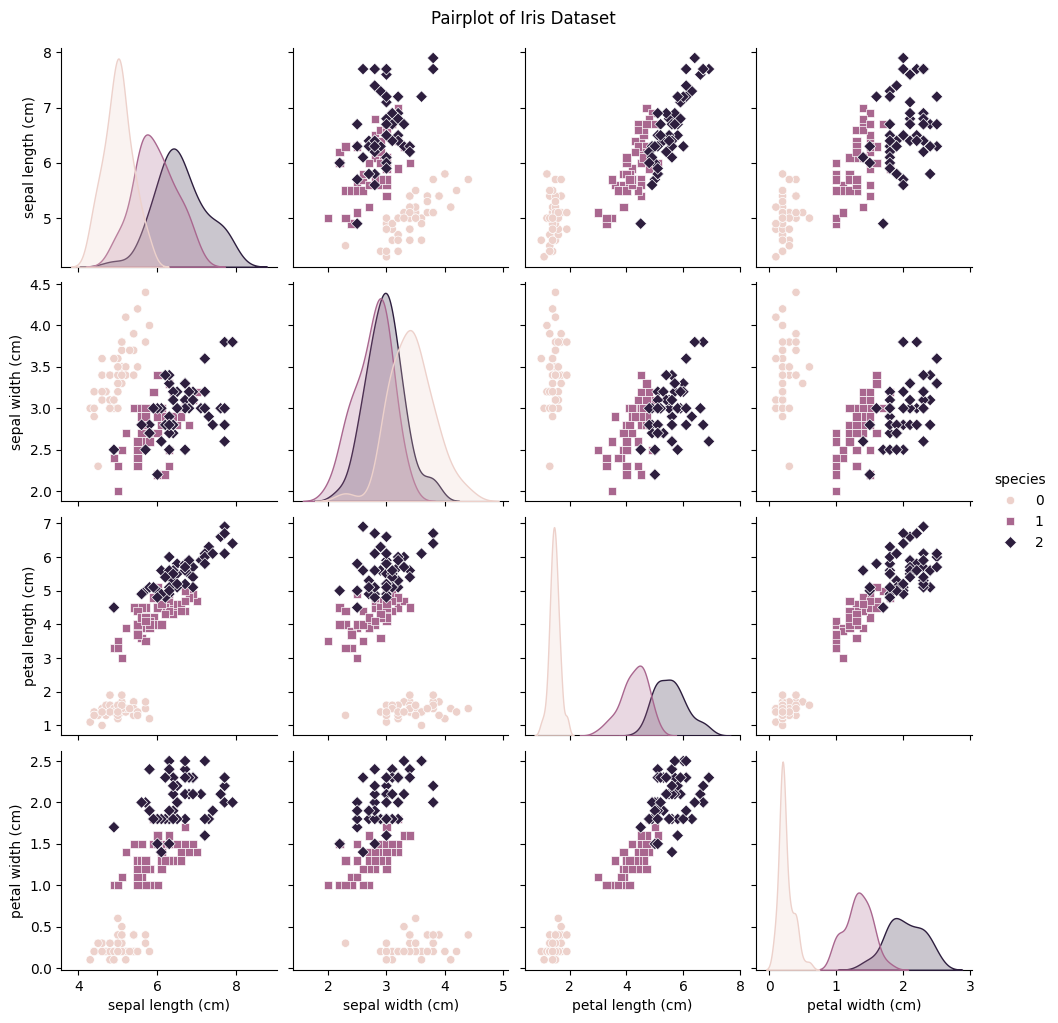

In [409]:
sns.pairplot(iris, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

In [410]:
##scaler = StandardScaler()
##scaled_features = scaler.fit_transform(iris.drop('species', axis=1))
##scaled_features

In [411]:
scaled_df = pd.DataFrame(iris, columns=iris.columns[:-1])
scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [412]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

## K-MEAN CLUSTURING

In [413]:
wcss = []

for i in range(2,21):
    km = KMeans( n_clusters=i,init='k-means++')
    km.fit(scaled_df)
    wcss.append(km.inertia_)

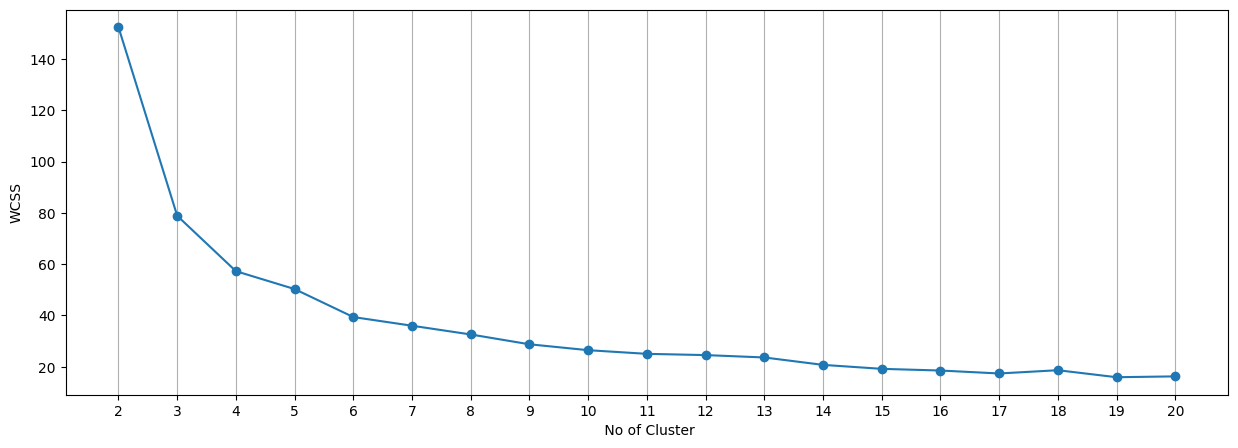

In [414]:
plt.figure(figsize=(15,5))
plt.plot([ i for i in range(2,21)],wcss,marker="o")
plt.xlabel(" No of Cluster")
plt.ylabel("WCSS")
plt.xticks([ i for i in range(2,21)])
plt.grid(axis="x")
plt.show()

In [415]:
kmn = KMeans(n_clusters=2)
scaled_df["km_predicted"] = kmn.fit_predict(scaled_df)
scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),km_predicted
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


c:\Users\PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn

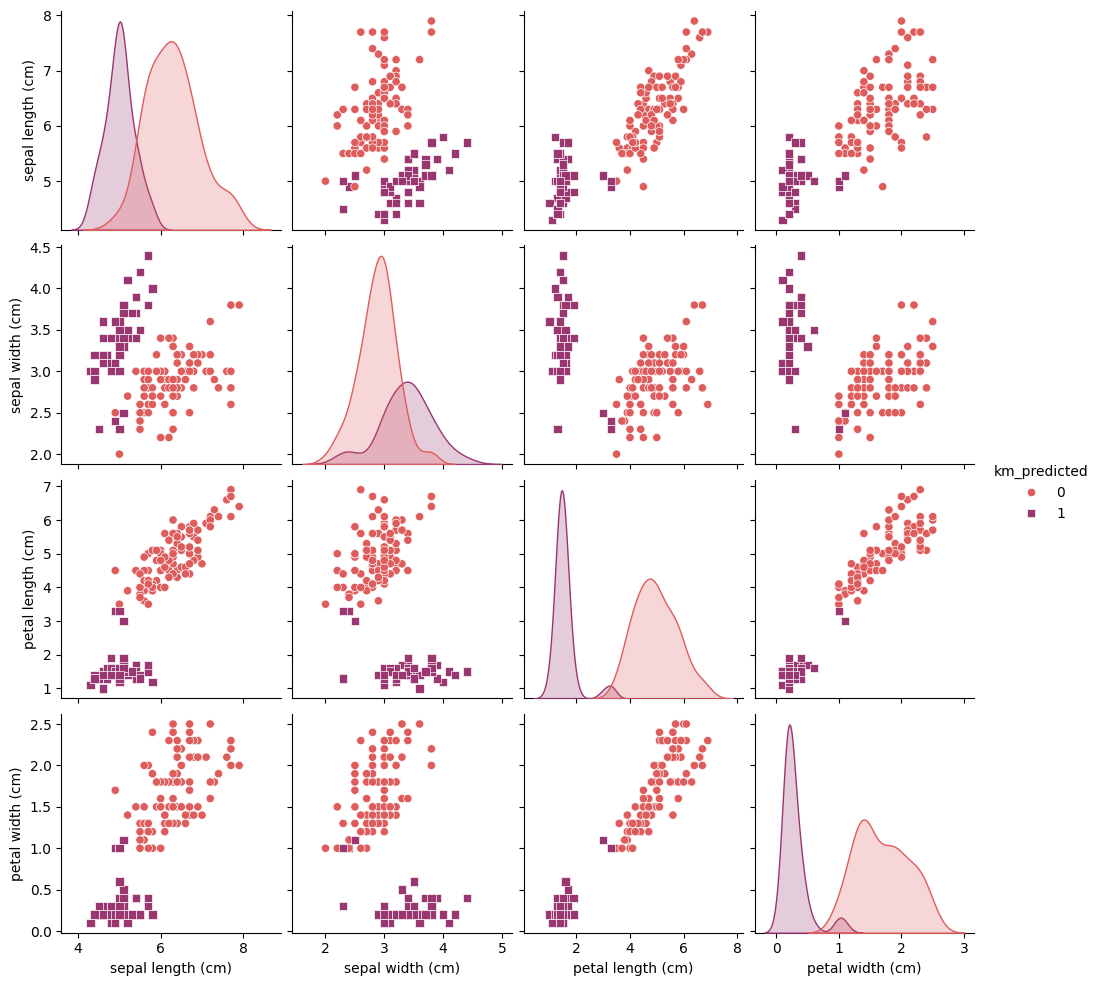

In [416]:
sns.pairplot(data=scaled_df,hue="km_predicted", markers=["o", "s", "D"],palette='flare')
plt.show()

## HIERARCHICAL CLUSTURING

In [417]:
scaled_data = scaled_df.drop(['km_predicted'], axis=1)

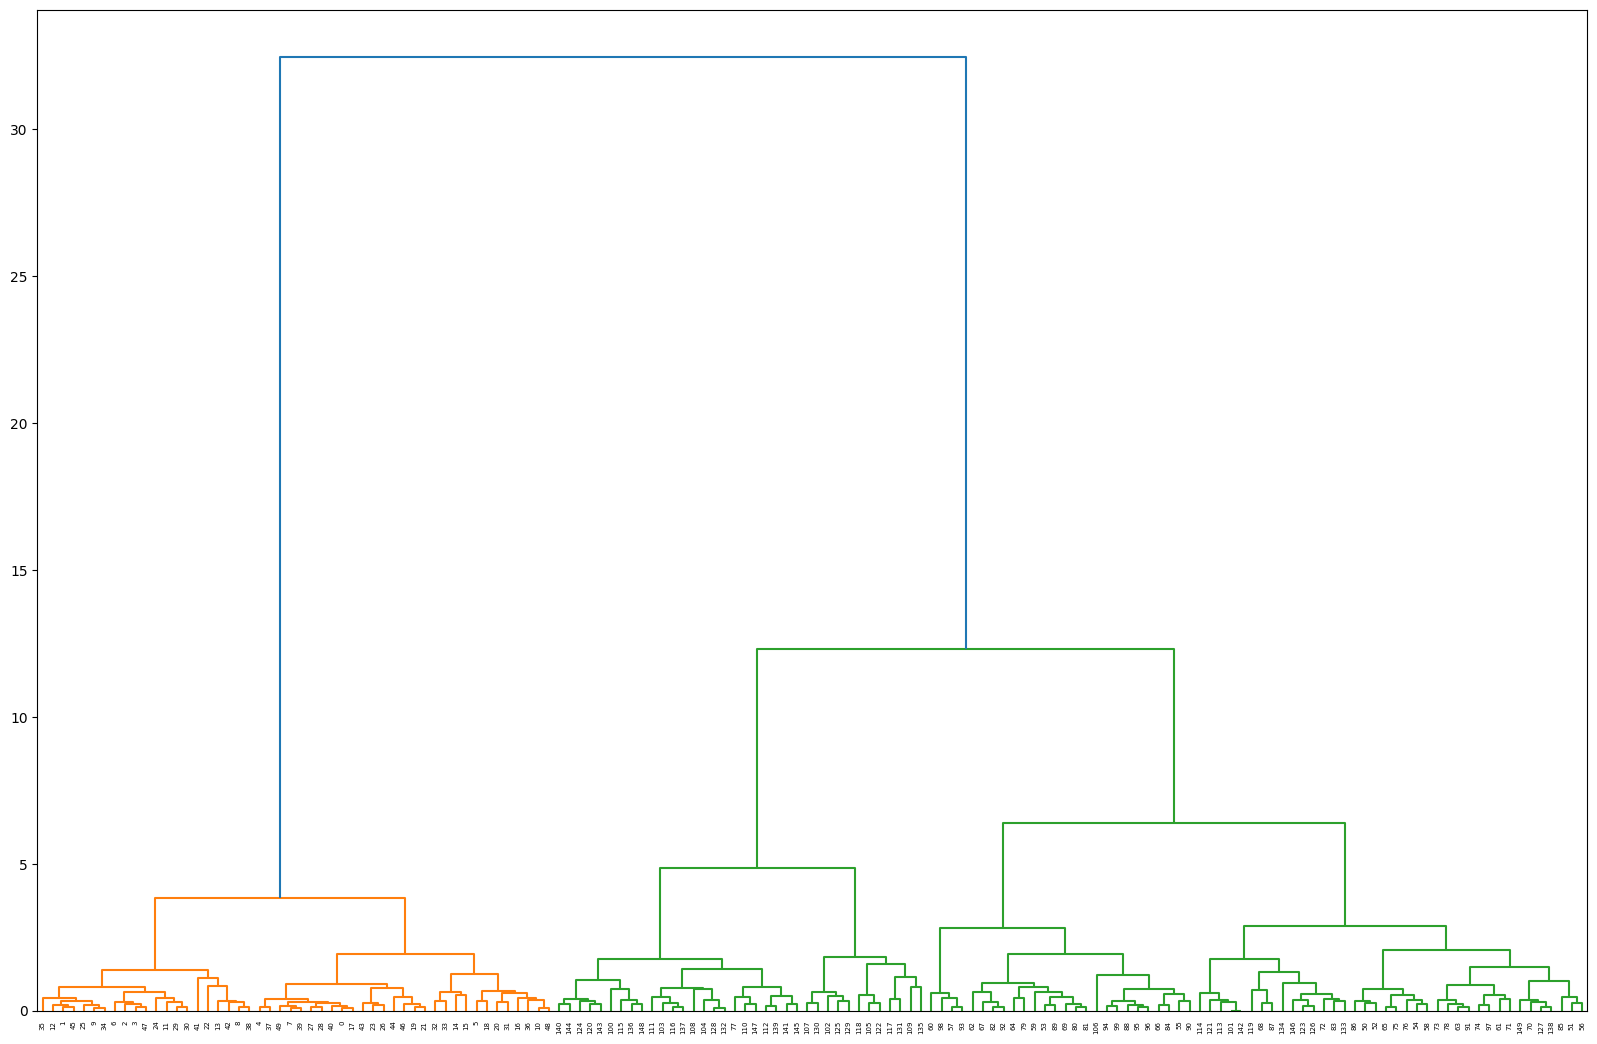

In [418]:
plt.figure(figsize=(20,13))
sc.dendrogram(sc.linkage(scaled_data,method='ward',metric='euclidean'))
plt.show()

In [419]:
ac = AgglomerativeClustering(n_clusters=2,linkage='single')
scaled_data["h_predicted"] = ac.fit_predict(scaled_data)
scaled_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),h_predicted
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


c:\Users\PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn

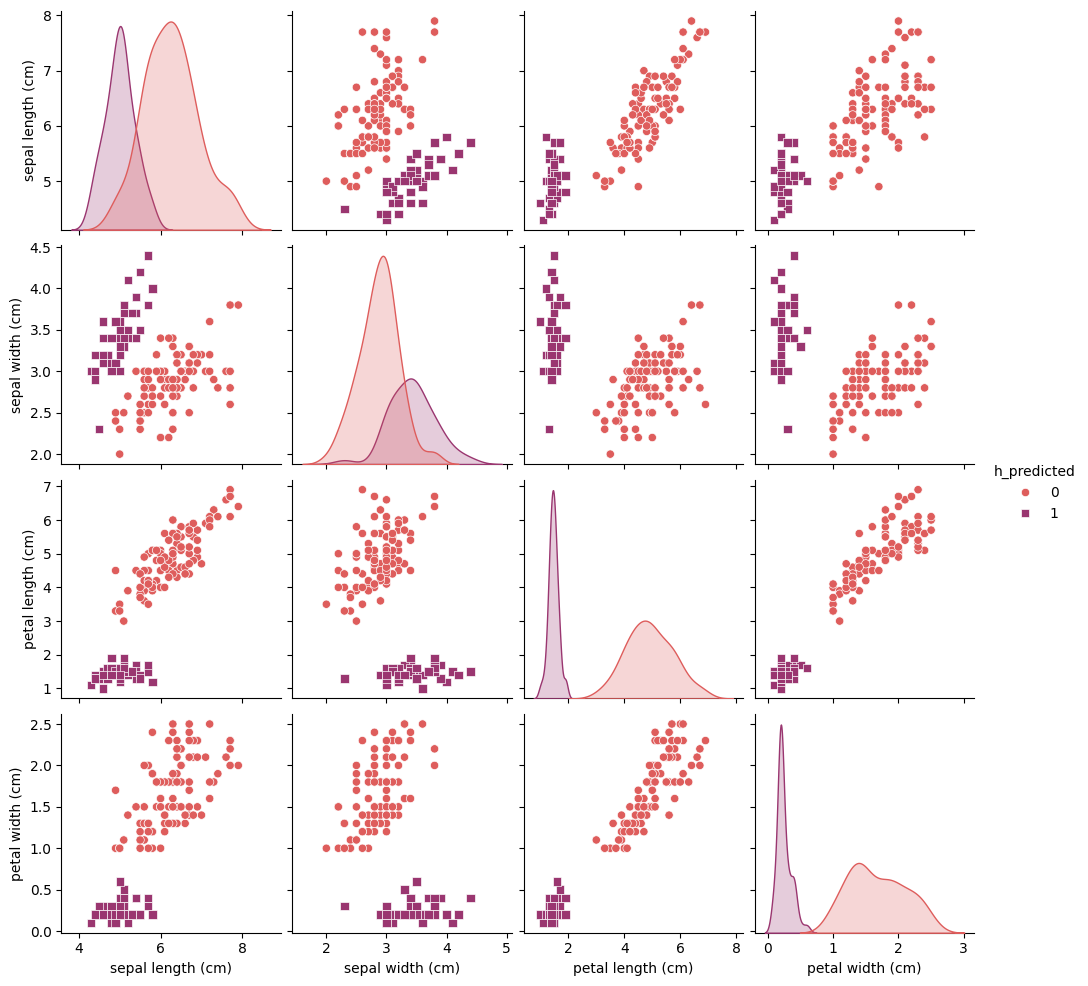

In [420]:
sns.pairplot(data=scaled_data,hue="h_predicted", markers=["o", "s", "D"],palette='flare')
plt.show()

## DBSCAN CLUSTURING ALGORITHM

In [421]:
scaled_d = scaled_data.drop(columns=['h_predicted'], axis=1)
scaled_d

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [422]:
db = DBSCAN(eps=0.5,min_samples=5)
scaled_d["db_predicted"] = db.fit_predict(scaled_d)

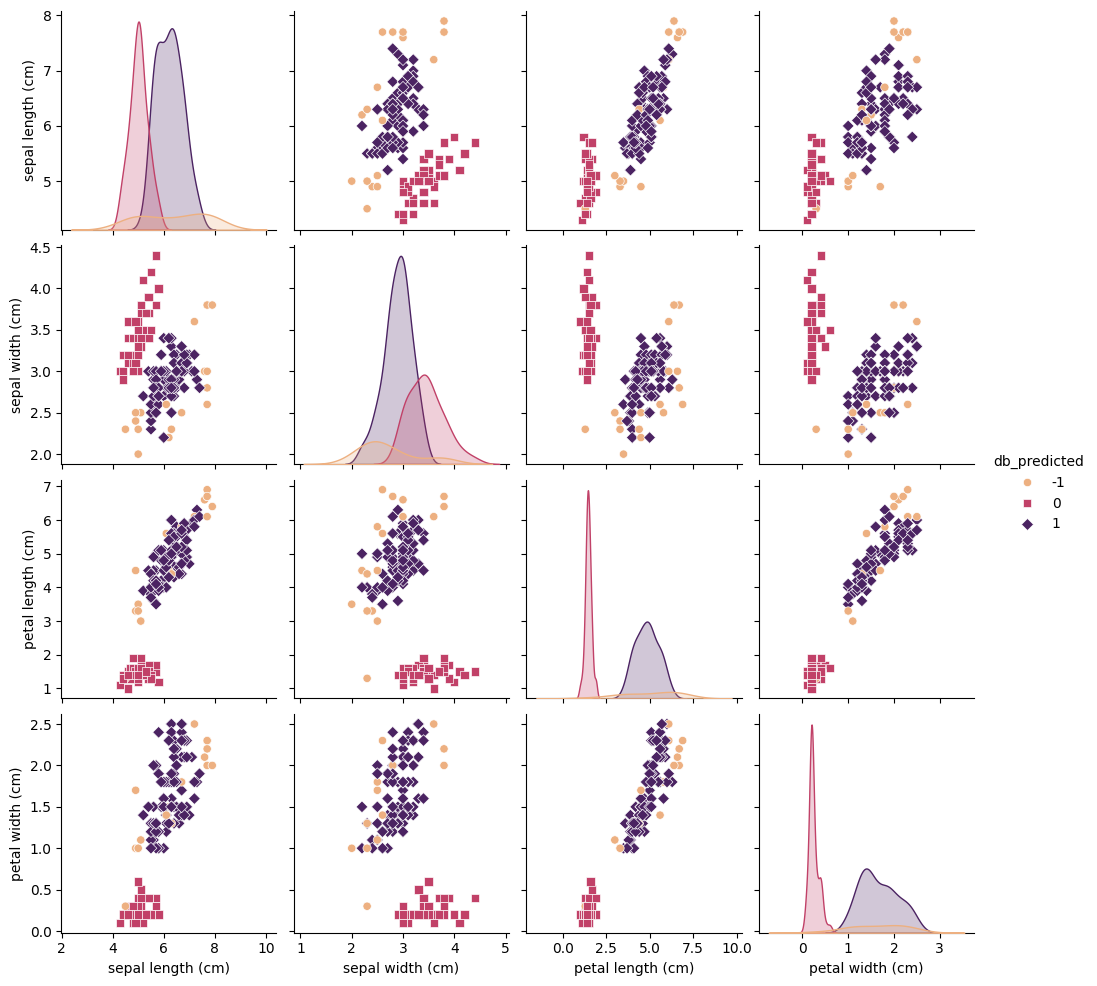

In [423]:
sns.pairplot(data=scaled_d,hue="db_predicted", markers=["o", "s", "D"],palette='flare')
plt.show()

## Silhouette Score

In [424]:
print(silhouette_score(scaled_df,labels=kmn.labels_))
print(silhouette_score(scaled_data,labels=ac.labels_))
print(silhouette_score(scaled_d,labels=db.labels_))

0.6938856233529059
0.6986374964000616
0.6079130430464743


In [425]:
km = []
no_c = [j for j in range(2,21)]

for i in range(2,21):
    km1 = KMeans(n_clusters=i)
    km1.fit(scaled_df)
    km.append(silhouette_score(scaled_df,km1.labels_))

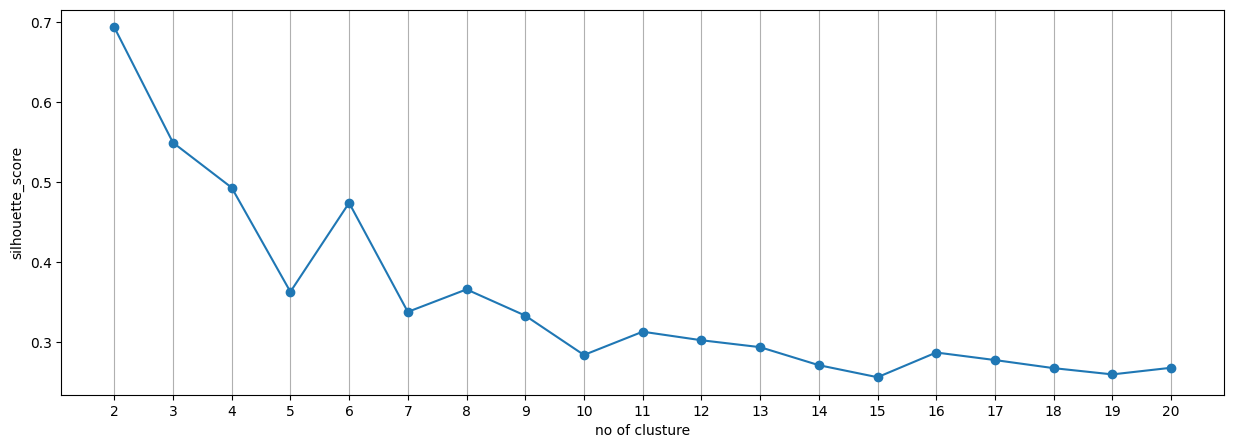

In [426]:
plt.figure(figsize=(15,5))
plt.plot(no_c,km,marker = 'o')
plt.xlabel("no of clusture")
plt.ylabel('silhouette_score')
plt.xticks(no_c)
plt.grid(axis='x')
plt.show()

In [427]:
ag = []
no_c1 = [j for j in range(2,21)]

for i in range(2,21):
    agg = AgglomerativeClustering(n_clusters=i)
    agg.fit(scaled_data)
    ag.append(silhouette_score(scaled_data,agg.labels_))

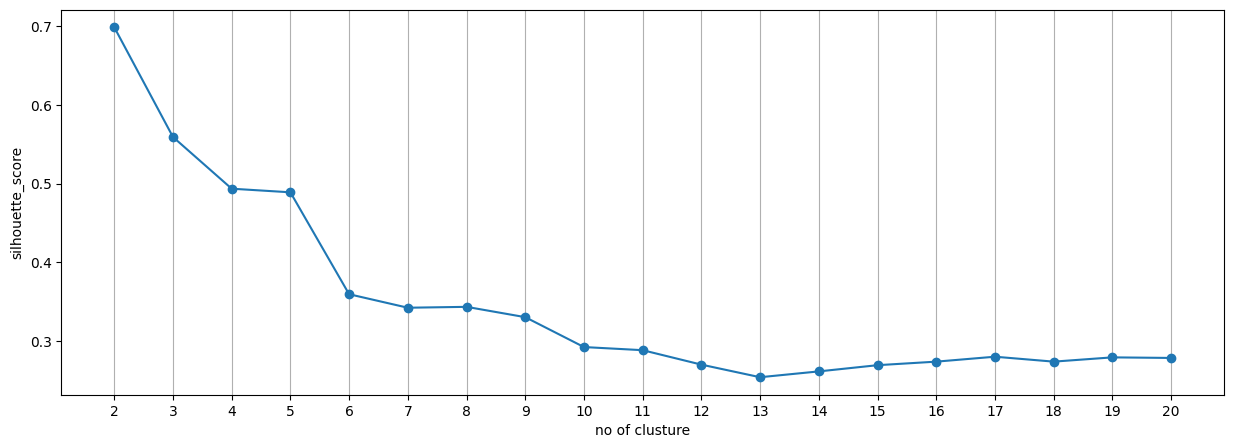

In [428]:
plt.figure(figsize=(15,5))
plt.plot(no_c1,ag,marker = 'o')
plt.xlabel("no of clusture")
plt.ylabel('silhouette_score')
plt.xticks(no_c1)
plt.grid(axis='x')
plt.show()

In [429]:
# Assuming scaled_d is your preprocessed data
db1 = []
eps_values = range(2, 21)
# Loop through different values for eps and min_samples
for i in eps_values:
    scan = DBSCAN(eps=i, min_samples=i)
    labels = scan.fit_predict(scaled_d)
    
    # Get unique labels excluding noise (-1)
    unique_labels = set(labels)
    valid_labels = [label for label in unique_labels if label != -1]
    
    # Check if there are at least 2 valid clusters
    if len(valid_labels) >= 2:
        score = silhouette_score(scaled_d, labels)
        db1.append(score)
    else:
        db1.append(-1)  # Append -1 for invalid configurations

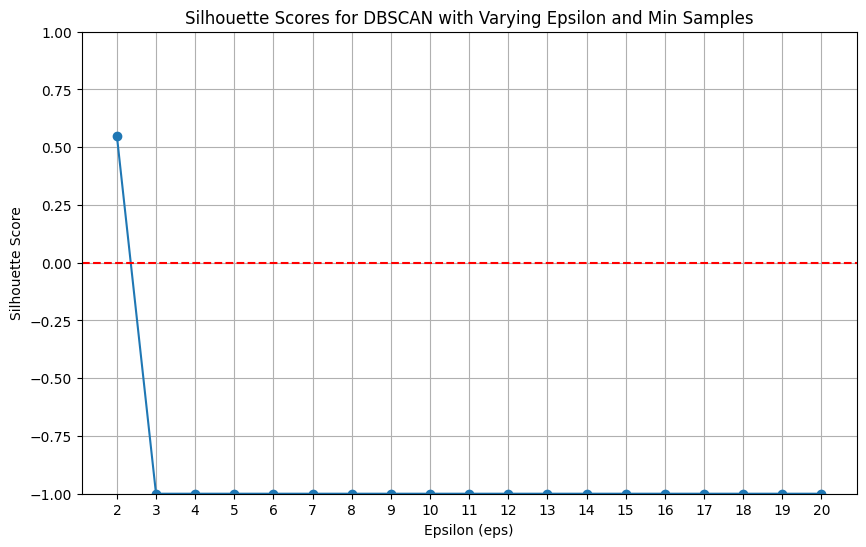

In [430]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(eps_values, db1, marker='o')
plt.title('Silhouette Scores for DBSCAN with Varying Epsilon and Min Samples')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.xticks(eps_values)
plt.grid()
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.ylim(-1, 1)  # Set y-axis limits
plt.show()